# WeatherPy

_________________________________

In [1]:
#import dependencies & api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#created list to generate zipped list of random lat and lng values during for loop
combined_lat_lngs = []

#created cities list for if statement append
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
combined_lat_lngs = zip(lats, lngs)

for combined_lat_lng in combined_lat_lngs:
    city = citipy.nearest_city(combined_lat_lng[0], combined_lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of random cities generated in the list: {len(cities)}")

Number of random cities generated in the list: 587


---

# OpenWeatherMap API 

In [3]:
#base url identified, as well as list of appended city_data 
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
city_data = []
print("Beginning Data Search...     ")
print("-----------------------------")
#city count set to 1 for count down
city_count = 1
#total_cityP=_count variable is just number of cities identified in previous cell
total_city_count = len(cities)
#for every city, use city_url to city_count of total_city_count and the city appended
for city in cities:
    city_url = f'{base_url} + {city}&appid={weather_api_key}'
    print(f"City {city_count} of {total_city_count} | {city}")
    #ensures city count number is different every time and not repeating the same number
    city_count = city_count+1
    #try used to find specified values using json 
    try:
        city_weather = requests.get(city_url).json()
        
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        #appends specified values
        #code enables creating a new dataframe required in the next cells
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #sets a parameter if city is not found to print text
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")    
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Search...     
-----------------------------
City 1 of 587 | puerto san carlos
City not found. Skipping...
City 2 of 587 | monahans
City 3 of 587 | fortuna
City 4 of 587 | olonkinbyen
City 5 of 587 | port-aux-francais
City 6 of 587 | st. john's
City not found. Skipping...
City 7 of 587 | hotan
City 8 of 587 | klyuchi
City 9 of 587 | saudarkrokur
City 10 of 587 | dudinka
City 11 of 587 | celestun
City 12 of 587 | ushuaia
City 13 of 587 | grytviken
City 14 of 587 | wailua homesteads
City 15 of 587 | waitangi
City 16 of 587 | avarua
City 17 of 587 | edinburgh of the seven seas
City 18 of 587 | blackmans bay
City 19 of 587 | port elizabeth
City 20 of 587 | sandnessjoen
City 21 of 587 | pacific grove
City 22 of 587 | georgetown
City 23 of 587 | sitia
City not found. Skipping...
City 24 of 587 | ilulissat
City 25 of 587 | camana
City 26 of 587 | sechura
City 27 of 587 | enewetak
City 28 of 587 | brokopondo
City 29 of 587 | puerto natales
City 30 of 587 | invercargill
City 31 o

City 264 of 587 | fort bragg
City 265 of 587 | pahrump
City 266 of 587 | woodlake
City 267 of 587 | la villa del rosario
City 268 of 587 | ocean city
City 269 of 587 | bel ombre
City 270 of 587 | zhangye
City 271 of 587 | chonchi
City 272 of 587 | kingston
City 273 of 587 | nova sintra
City not found. Skipping...
City 274 of 587 | paulden
City 275 of 587 | shibirghan
City 276 of 587 | i-n-salah
City 277 of 587 | birao
City 278 of 587 | pandan
City 279 of 587 | kawalu
City 280 of 587 | arad
City 281 of 587 | itoman
City 282 of 587 | arteche
City 283 of 587 | aasiaat
City 284 of 587 | talnakh
City 285 of 587 | pawcatuck
City 286 of 587 | ulanhot
City 287 of 587 | thunder bay
City 288 of 587 | sisimiut
City 289 of 587 | ardestan
City 290 of 587 | banda
City 291 of 587 | castillos
City 292 of 587 | saynshand
City 293 of 587 | porto novo
City 294 of 587 | quepos
City 295 of 587 | alofi
City 296 of 587 | page
City 297 of 587 | muisne
City 298 of 587 | taitung city
City 299 of 587 | hozat
Cit

City 524 of 587 | tafuna
City 525 of 587 | virginia beach
City 526 of 587 | lautoka
City 527 of 587 | al lagowa
City 528 of 587 | forbes
City 529 of 587 | pokrovsk
City 530 of 587 | orlov
City 531 of 587 | miyanoura
City not found. Skipping...
City 532 of 587 | tabas
City 533 of 587 | makushino
City 534 of 587 | catanzaro
City 535 of 587 | tucupita
City 536 of 587 | daru
City 537 of 587 | soderkoping
City not found. Skipping...
City 538 of 587 | raton
City 539 of 587 | nagqu
City 540 of 587 | eyl
City 541 of 587 | barra de santo antonio
City 542 of 587 | holualoa
City 543 of 587 | nhamunda
City 544 of 587 | shemordan
City 545 of 587 | mugia
City 546 of 587 | san patricio
City 547 of 587 | warrenton
City 548 of 587 | kailua-kona
City 549 of 587 | vingt cinq
City not found. Skipping...
City 550 of 587 | prabumulih
City not found. Skipping...
City 551 of 587 | paita
City 552 of 587 | qarqaraly
City 553 of 587 | kotlas
City 554 of 587 | cozumel
City not found. Skipping...
City 555 of 587 |

In [6]:
# Converted cities weather data into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Display Count
city_data_df.count()

City          519
Lat           519
Lng           519
Max Temp      519
Humidity      519
Cloudiness    519
Wind Speed    519
Country       519
Date          519
dtype: int64

In [7]:
#read new dataframe to ensure everything looks as expected
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monahans,31.5943,-102.8926,302.53,11,0,0.45,US,1683828250
1,fortuna,40.5982,-124.1573,287.96,83,100,2.57,US,1683828250
2,olonkinbyen,70.9221,-8.7187,272.63,86,95,4.04,SJ,1683828250
3,port-aux-francais,-49.3500,70.2167,280.66,92,100,18.57,TF,1683828251
4,hotan,37.0997,79.9269,291.48,10,1,3.15,CN,1683828252


In [9]:
#save data to csv
city_data_df.to_csv("../WeatherPy/output_data/cities.csv", index_label="City_ID")

In [11]:
#to double check 'cities.csv' file reads correctly
city_data_df = pd.read_csv("../WeatherPy/output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monahans,31.5943,-102.8926,302.53,11,0,0.45,US,1683828250
1,fortuna,40.5982,-124.1573,287.96,83,100,2.57,US,1683828250
2,olonkinbyen,70.9221,-8.7187,272.63,86,95,4.04,SJ,1683828250
3,port-aux-francais,-49.3500,70.2167,280.66,92,100,18.57,TF,1683828251
4,hotan,37.0997,79.9269,291.48,10,1,3.15,CN,1683828252


# Scatter Plots

#### Latitude Vs. Temperature

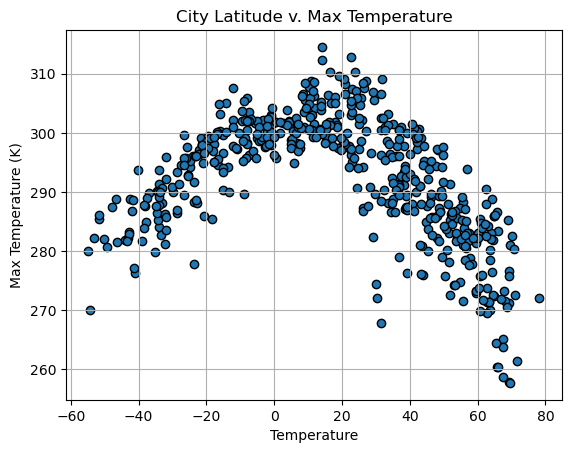

In [166]:
#created and saved scatter plot for City Latitude and Temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.xlabel('Temperature')
plt.ylabel('Max Temperature (K)')
plt.grid()
plt.title('City Latitude v. Max Temperature')



plt.savefig("../WeatherPy/output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

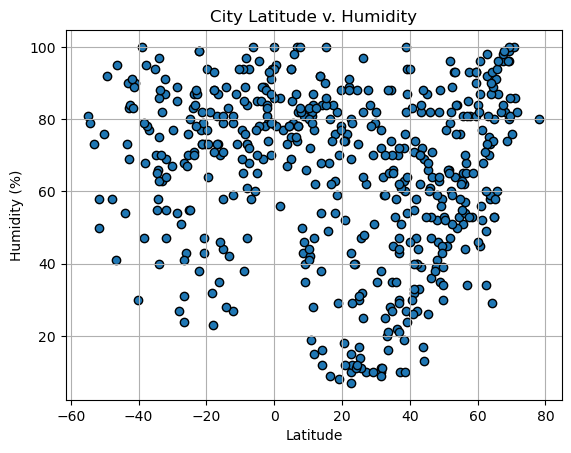

In [15]:
#created and saved scatter plot for City Latitude and Humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude v. Humidity')



plt.savefig("../WeatherPy/output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

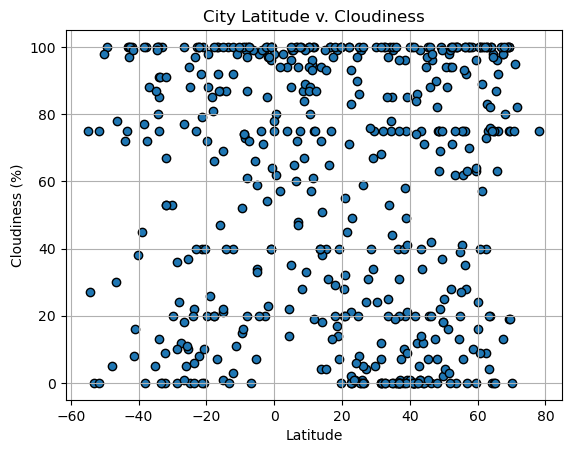

In [16]:
#created and saved scatter plot for City Latitude and Cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude v. Cloudiness')



plt.savefig("../WeatherPy/output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

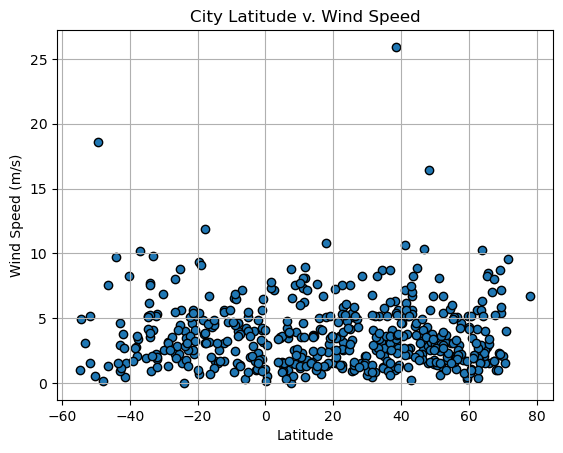

In [17]:
#created and saved scatter plot for City Latitude and Windspeed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker='o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title('City Latitude v. Wind Speed')



plt.savefig("../WeatherPy/output_data/Fig4.png")

plt.show()

---

# Linear Regression 


In [132]:
#created code to find latitudes greater than or equal to 0 for northern hemisphere
find_n_hemisphere = city_data_df.loc[city_data_df['Lat'] >= 0]

#dropped index to clean df
n_hemisphere = pd.DataFrame(find_n_hemisphere).reset_index(drop=True)
n_hemisphere.head()
#n_hemisphere.count()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monahans,31.5943,-102.8926,302.53,11,0,0.45,US,1683828250
1,fortuna,40.5982,-124.1573,287.96,83,100,2.57,US,1683828250
2,olonkinbyen,70.9221,-8.7187,272.63,86,95,4.04,SJ,1683828250
3,hotan,37.0997,79.9269,291.48,10,1,3.15,CN,1683828252
4,klyuchi,52.2667,79.1667,285.21,60,28,5.42,RU,1683828252


In [133]:
#created code to find latitudes less than 0 for northern hemisphere
find_s_hemisphere = city_data_df.loc[city_data_df['Lat'] < 0]
#reset index to clean df
s_hemisphere = pd.DataFrame(find_s_hemisphere).reset_index(drop=True)
s_hemisphere.head()
#s_hemisphere.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,280.66,92,100,18.57,TF,1683828251
1,ushuaia,-54.8000,-68.3000,279.96,81,75,1.03,AR,1683828254
2,grytviken,-54.2811,-36.5092,270.11,79,27,4.95,GS,1683828254
3,waitangi,-43.9535,-176.5597,281.94,54,72,9.75,NZ,1683828255
4,avarua,-21.2078,-159.7750,298.18,73,40,5.66,CK,1683828255


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7974736754361471


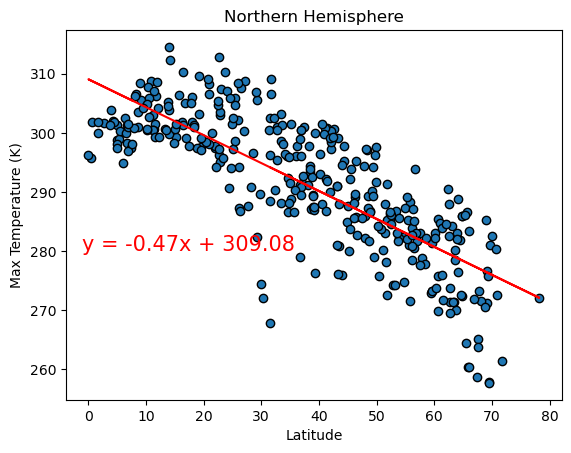

In [192]:
# Linear regression on Northern Hemisphere: Lat. v. Temp.
#includes r values and y=mx+b
plt.scatter(n_hemisphere['Lat'],n_hemisphere['Max Temp'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Lat'], n_hemisphere['Max Temp'])
print(f'The r-value is: {rvalue}')
regress_values = (n_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-1,280),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Northern Hemisphere')
plt.show()

The r-value is: 0.821875221556582


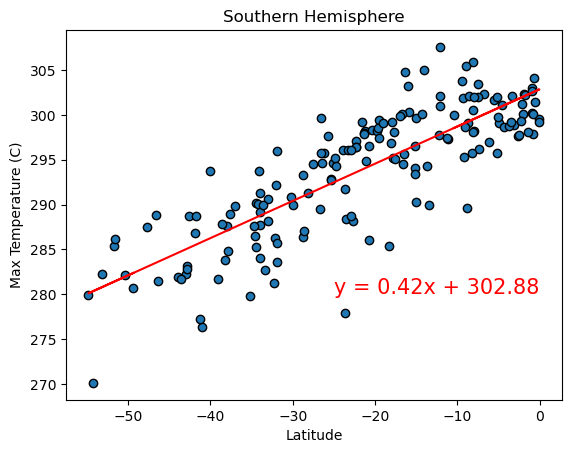

In [193]:
# Linear regression on Southern Hemisphere: Lat. v. Temp.
#includes r values and y=mx+b

plt.scatter(s_hemisphere['Lat'],s_hemisphere['Max Temp'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Lat'], s_hemisphere['Max Temp'])
print(f'The r-value is: {rvalue}')
regress_values = (s_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,280),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1233971878942196


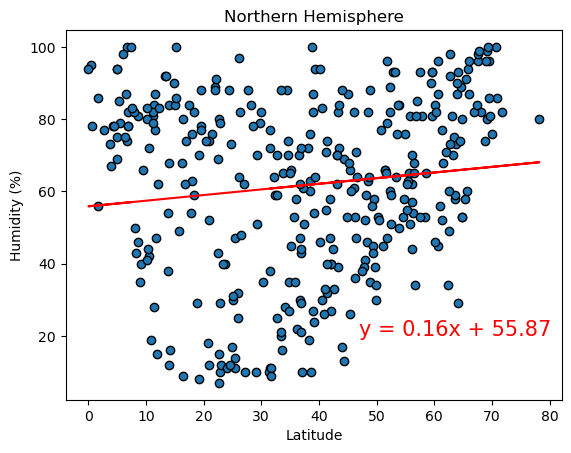

In [175]:
# Linear regression on Northern Hemisphere: Lat. v. Hum.
#includes r values and y=mx+b

plt.scatter(n_hemisphere['Lat'],n_hemisphere['Humidity'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Lat'], n_hemisphere['Humidity'])
print(f'The r-value is: {rvalue}')
regress_values = (n_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(47,20),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere')
plt.show()

The r-value is: 0.12711758561830744


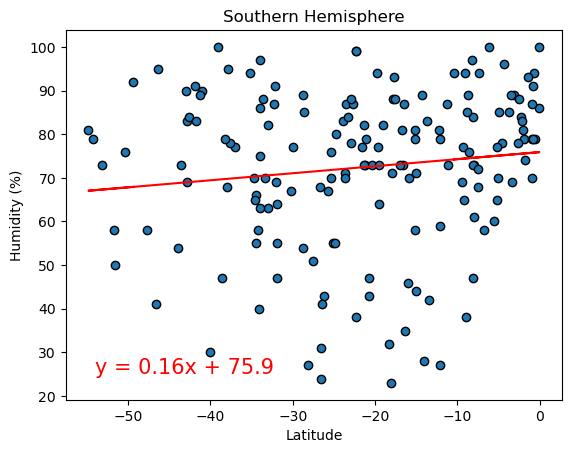

In [176]:
# Linear regression on Southern Hemisphere: Lat. v. Hum.
#includes r values and y=mx+b
plt.scatter(s_hemisphere['Lat'],s_hemisphere['Humidity'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Lat'], s_hemisphere['Humidity'])
print(f'The r-value is: {rvalue}')
regress_values = (s_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-54,25),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0011953984521159964


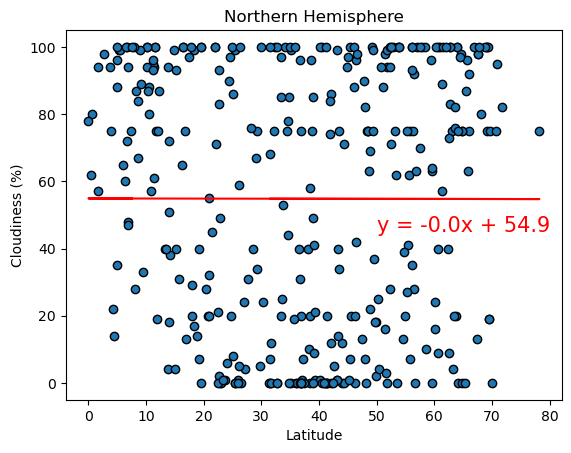

In [178]:
# Linear regression on Northern Hemisphere: Lat. v. Cloud.
#includes r values and y=mx+b
plt.scatter(n_hemisphere['Lat'],n_hemisphere['Cloudiness'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Lat'], n_hemisphere['Cloudiness'])
print(f'The r-value is: {rvalue}')
regress_values = (n_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere')
plt.show()

The r-value is: 0.11350998212304787


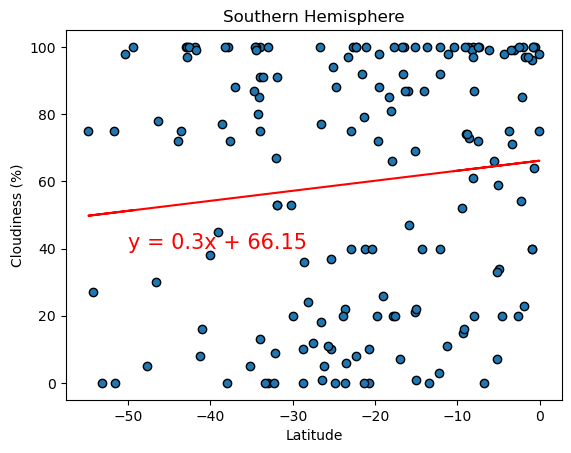

In [179]:
# Linear regression on Southern Hemisphere: Lat. v. Cloud.
#includes r values and y=mx+b

plt.scatter(s_hemisphere['Lat'],s_hemisphere['Cloudiness'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Lat'], s_hemisphere['Cloudiness'])
print(f'The r-value is: {rvalue}')
regress_values = (s_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007144755107147526


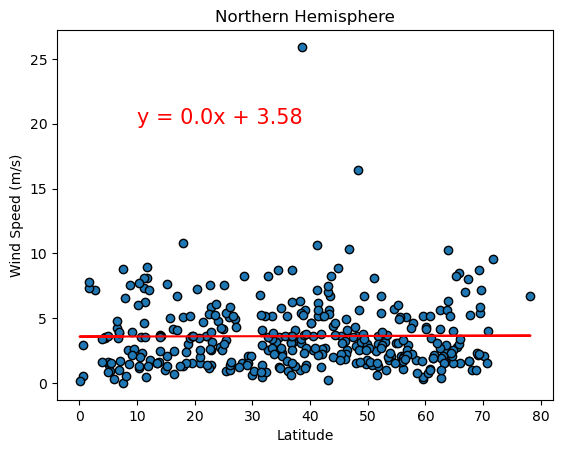

In [180]:
# Linear regression on Northern Hemisphere: Lat. v. Wind.
#includes r values and y=mx+b

plt.scatter(n_hemisphere['Lat'],n_hemisphere['Wind Speed'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_hemisphere['Lat'], n_hemisphere['Wind Speed'])
print(f'The r-value is: {rvalue}')
regress_values = (n_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(n_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere')
plt.show()

The r-value is: -0.10077420191924102


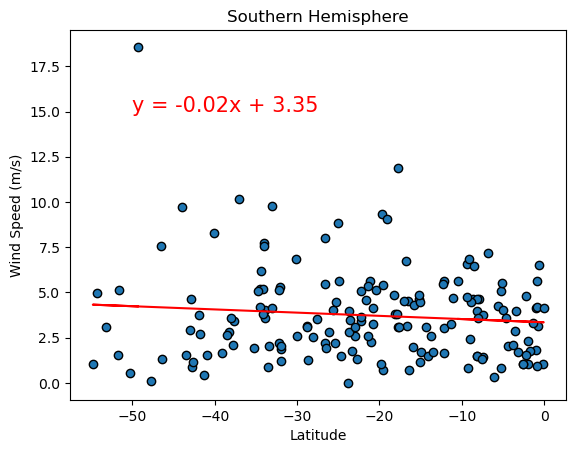

In [181]:
# Linear regression on Southern Hemisphere: Lat. v. Wind.
#includes r values and y=mx+b

plt.scatter(s_hemisphere['Lat'],s_hemisphere['Wind Speed'], marker='o', edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_hemisphere['Lat'], s_hemisphere['Wind Speed'])
print(f'The r-value is: {rvalue}')
regress_values = (s_hemisphere['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(s_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")



plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** The latitude and max temp. of the Northern hemisphere displays an inverse (negative) correlation. This means that as we move East along  the Northern Hemisphere in increasing increments (latitude), we expect to see a decrease in max temperature (K).  On the other hand, there is a positive correlation between latitude and max temp. of the Souther Hemisphere, indicating that as we move West across the Southern Hemisphere and decrease in  latitudinal lines, we expect the max temperature (K) to increase. There is a weak, slightly positive correlation between latitude and humidity of the Northern hemisphere. This however has no statistical insignificance as the r-value is below 0.2. Similarly, the Southern hemisphere (lat v. Humidity) exhibits a similar situation with a r-value below 0.2. Latitude and cloudiness of Northern and Southern Hemisphere shows little to no correlation. Wind speed and latitude of both hemispheres reveal no relationship between the two.  The strongest correlation occurred between latitude and max temperatures of the Northern and Southern hemispheres. The rest of the generated scatter plots either produced weak to no correlation. 